In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

sns.set_theme(style="whitegrid", context="talk")

# Load dataset
wine = load_wine(as_frame=True)
df = wine.frame  # includes features + target


#### Pairplot

Good vs. bad:

1) Bad pairplot

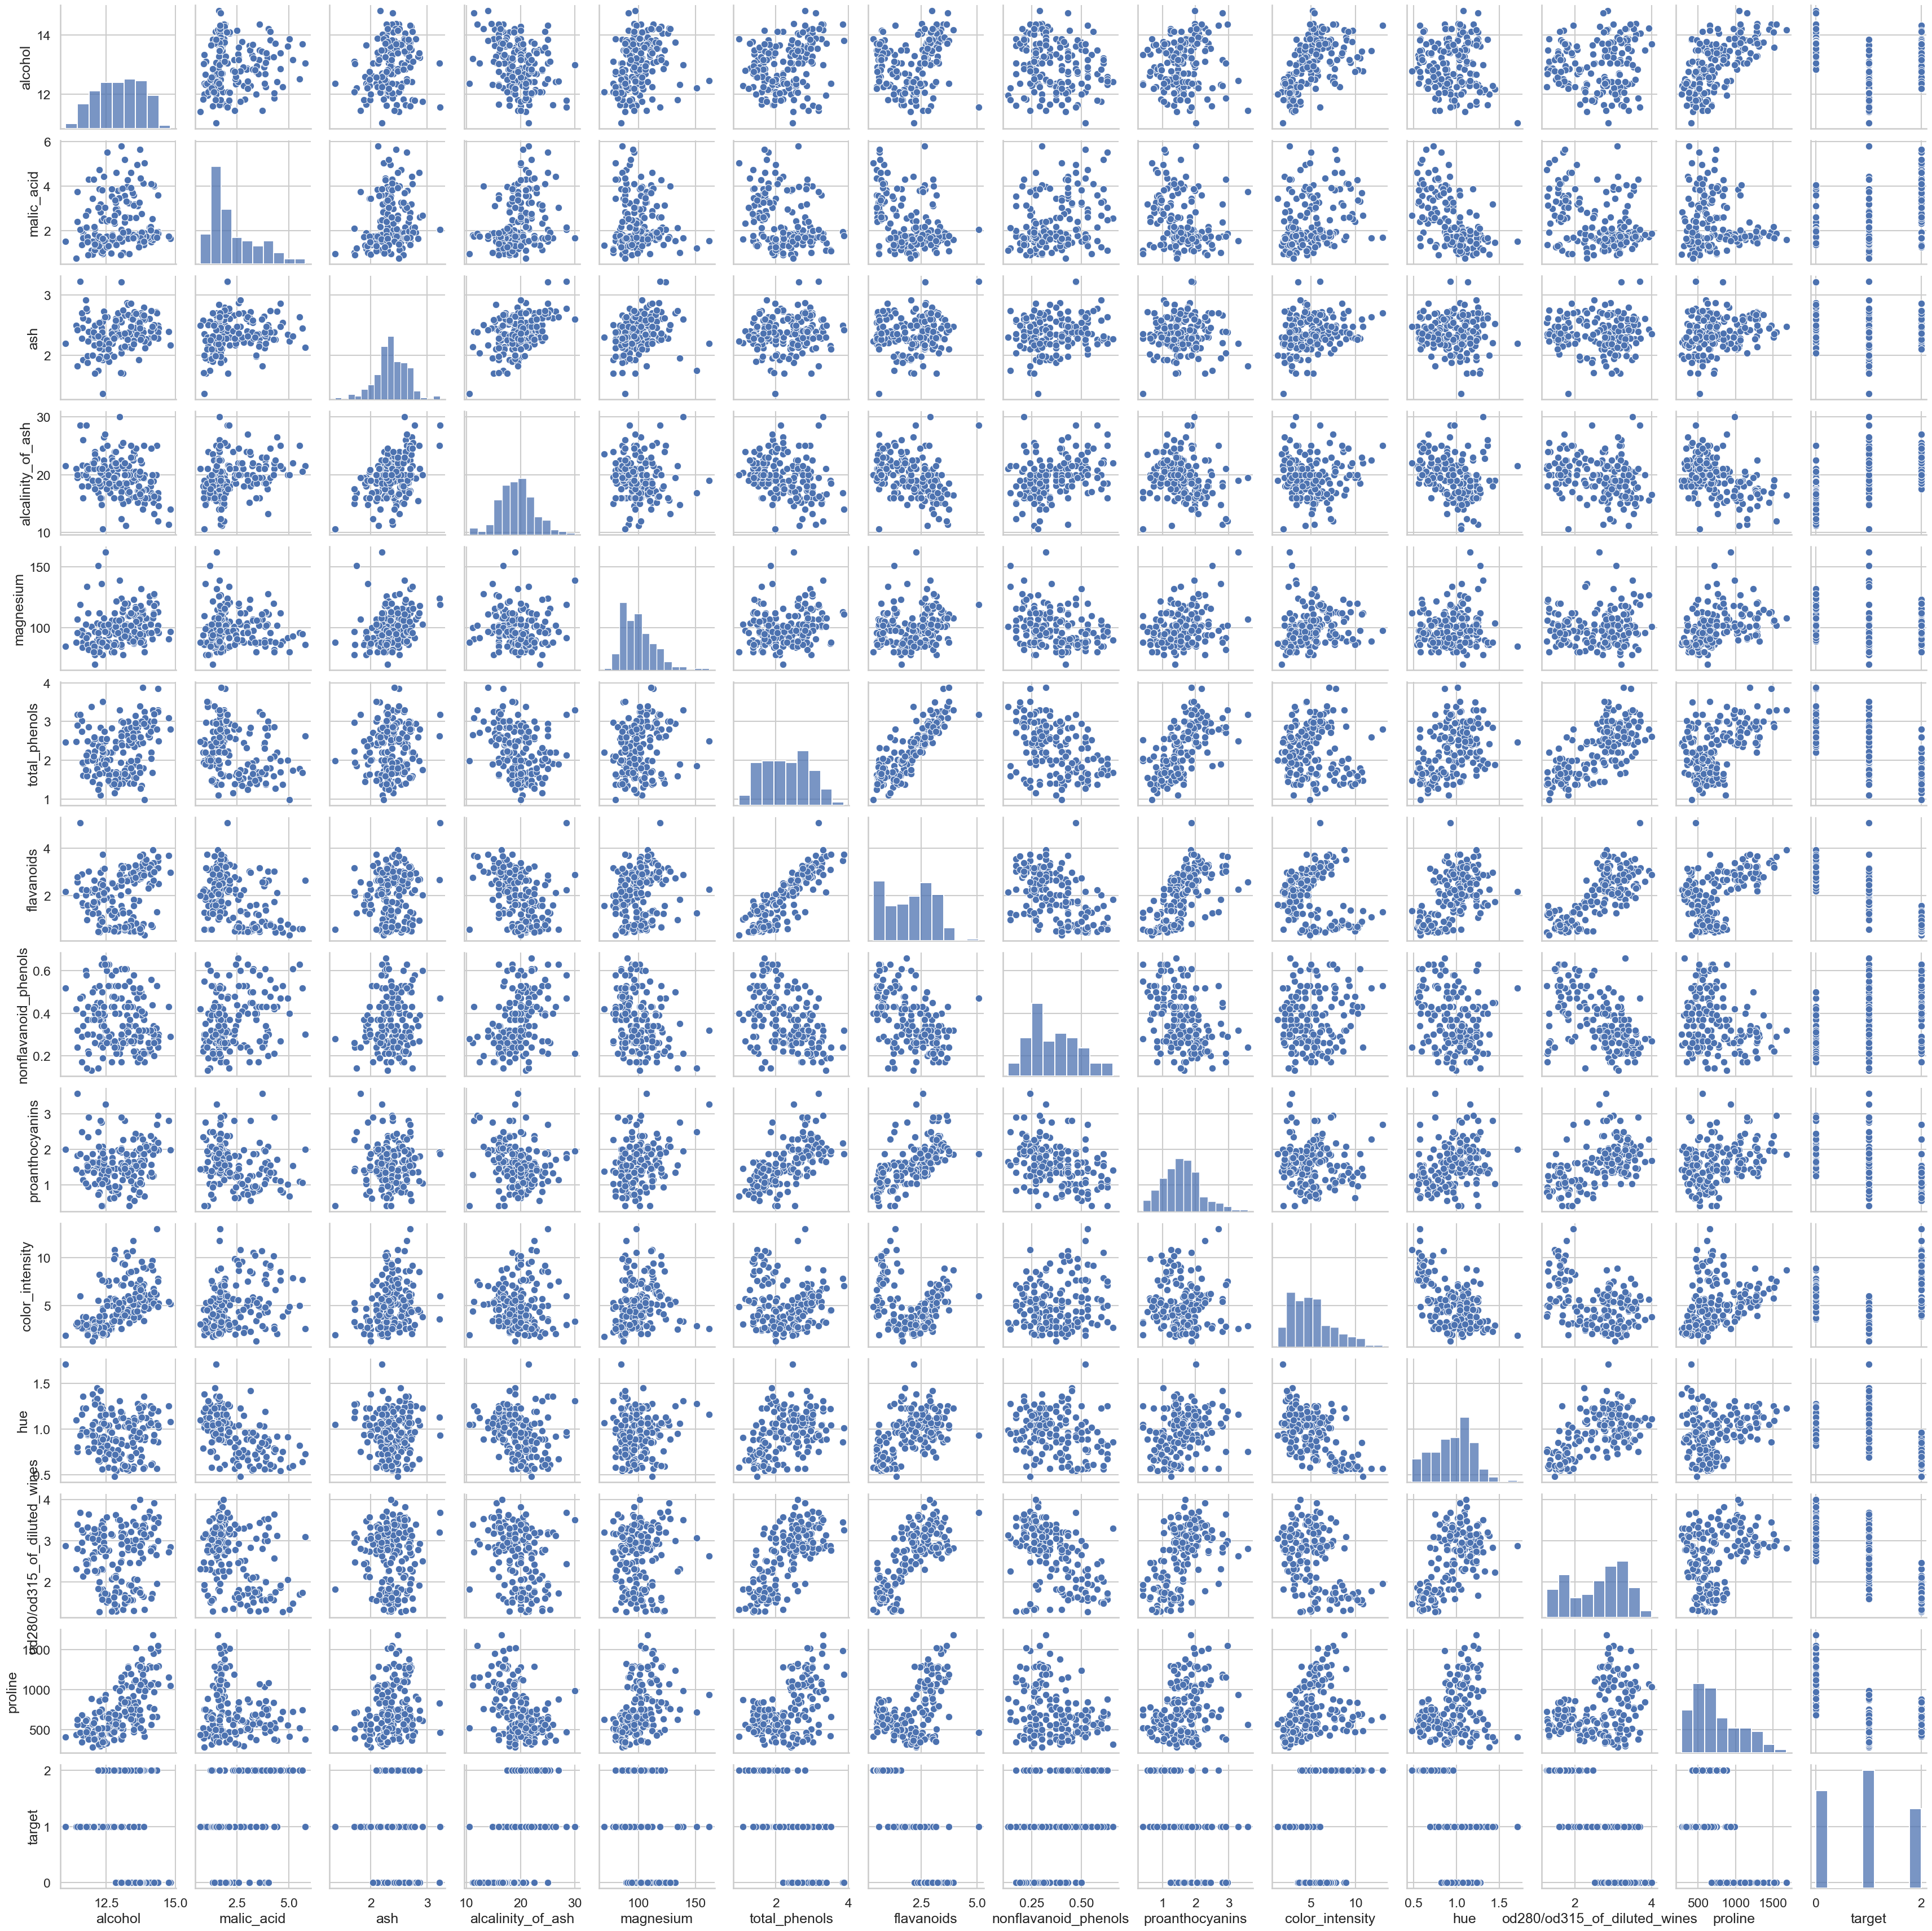

In [24]:
sns.pairplot(df)
plt.show()

2) Good pairplot:

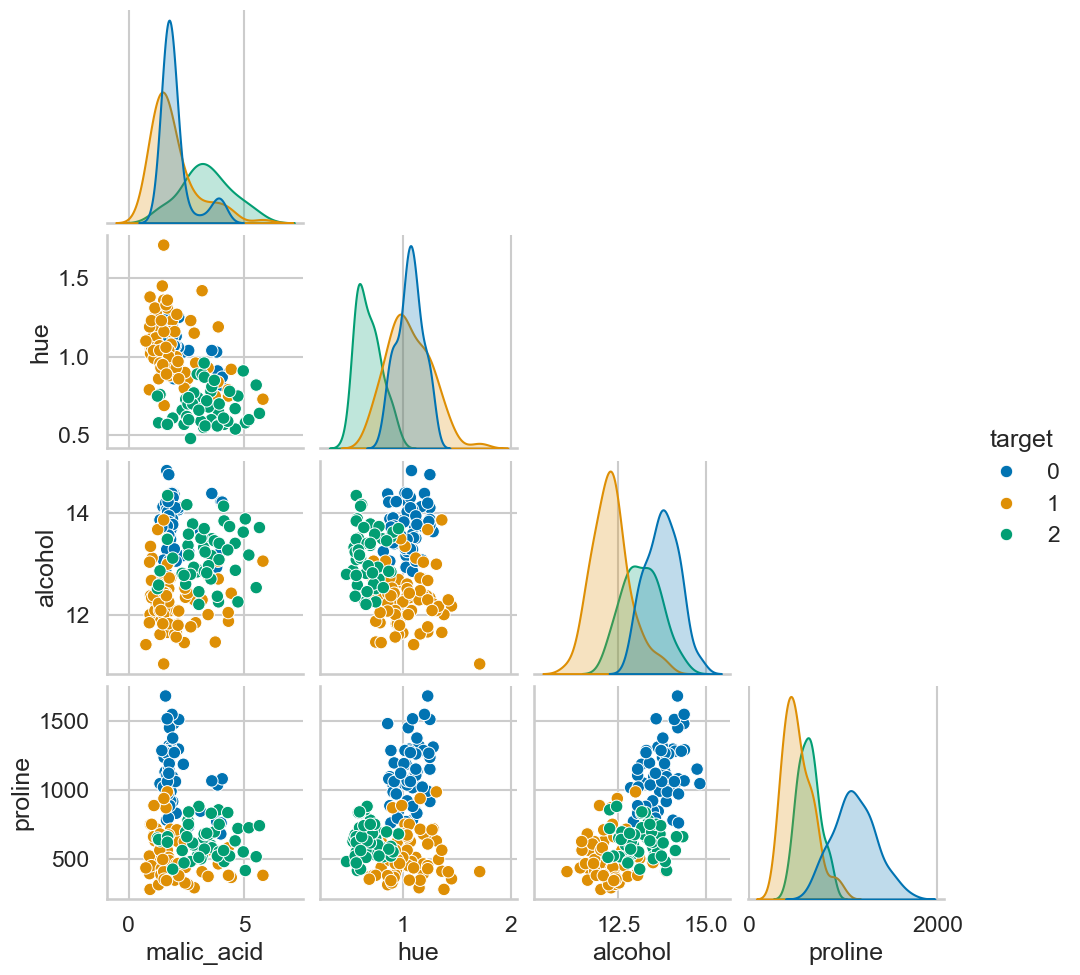

In [23]:
# selection = df.columns[:-1],    # all feature columns, target removed

sns.pairplot(
    df,
    vars=["malic_acid", "hue", "alcohol", "proline"],
    hue="target",
    diag_kind="kde",
    corner=True,
    palette="colorblind",
    height=2.5
)
plt.show()


Heatmap

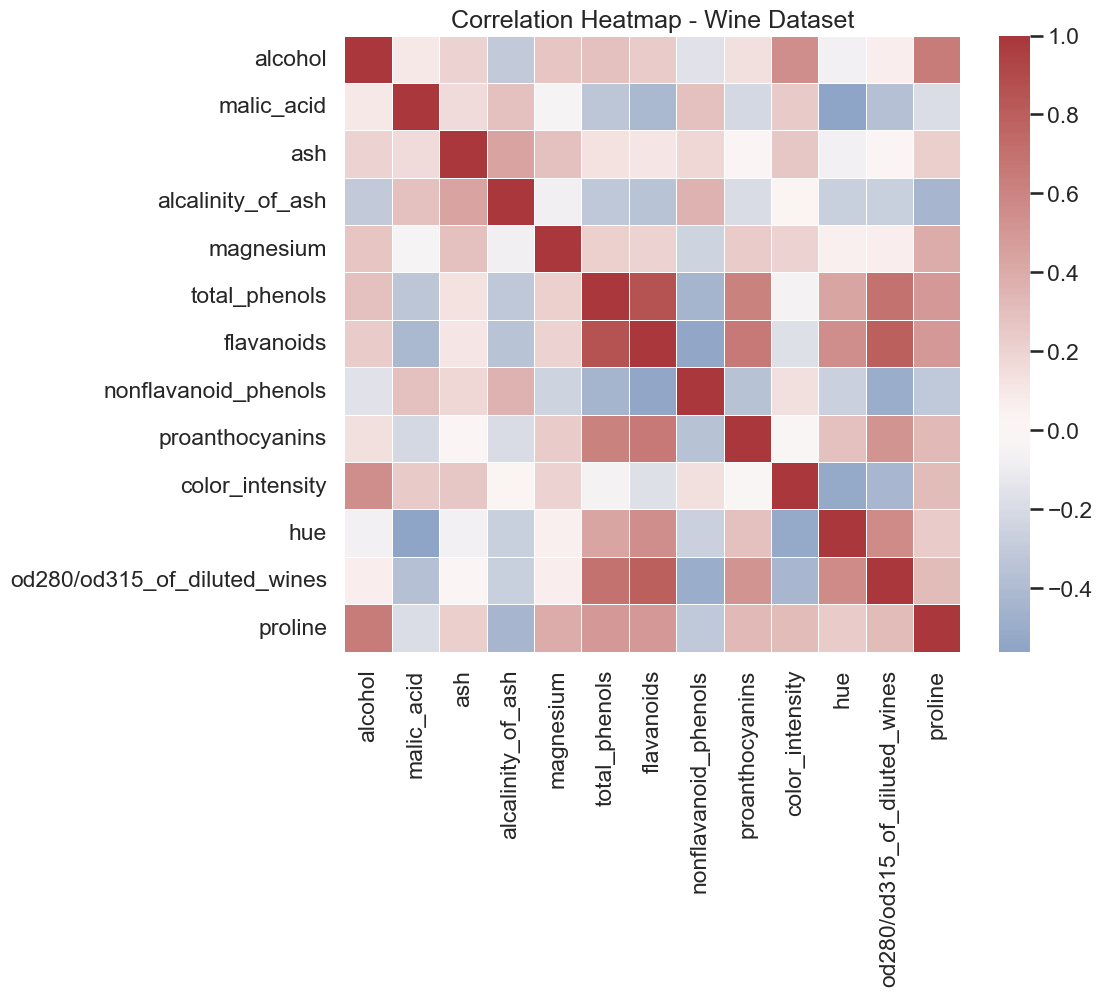

In [16]:
plt.figure(figsize=(10, 8))
corr = df.drop(columns="target").corr()

sns.heatmap(
    corr,
    cmap="vlag",
    center=0,
    square=True,
    annot=False,
    linewidths=0.5
)

plt.title("Correlation Heatmap - Wine Dataset")
plt.show()


#### FacetGrid

Good vs. bad plot:

1) Bad FacetGrid

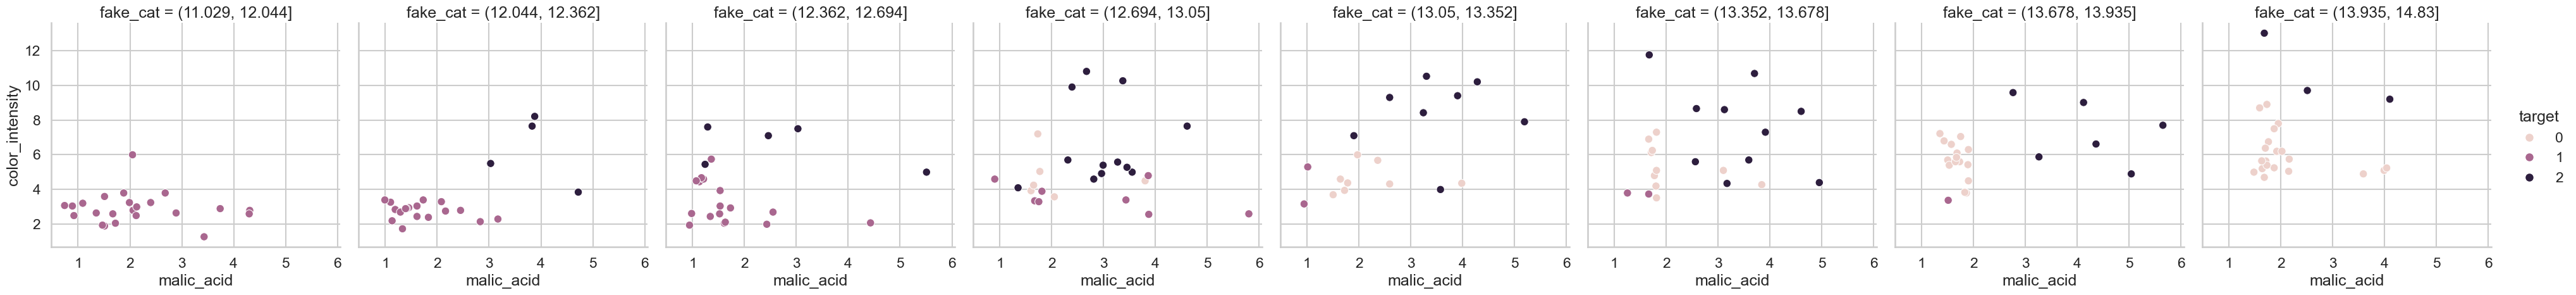

In [26]:
# Artificially create too many categories
df_bad = df.copy()
df_bad["fake_cat"] = pd.qcut(df_bad["alcohol"], q=8)  # 8 facets

sns.relplot(
    data=df_bad,
    x="malic_acid",
    y="color_intensity",
    col="fake_cat",         # too many columns
    hue="target",
    kind="scatter",
    col_wrap=8,
    # sharex=False,           # no shared axes
    # sharey=False
)
plt.show()


2) Good FacetGrid

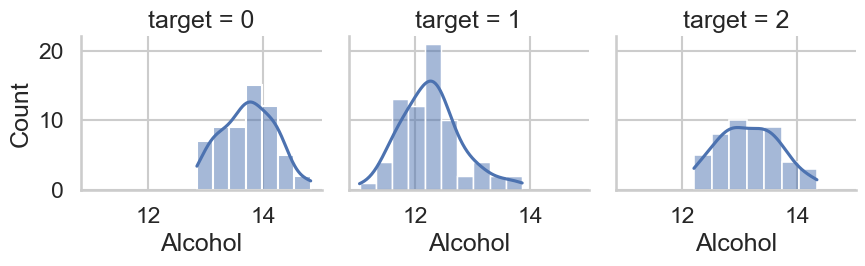

In [28]:
g = sns.FacetGrid(df, col="target", sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="alcohol", kde=True)
g.set_axis_labels("Alcohol", "Count")
plt.show()


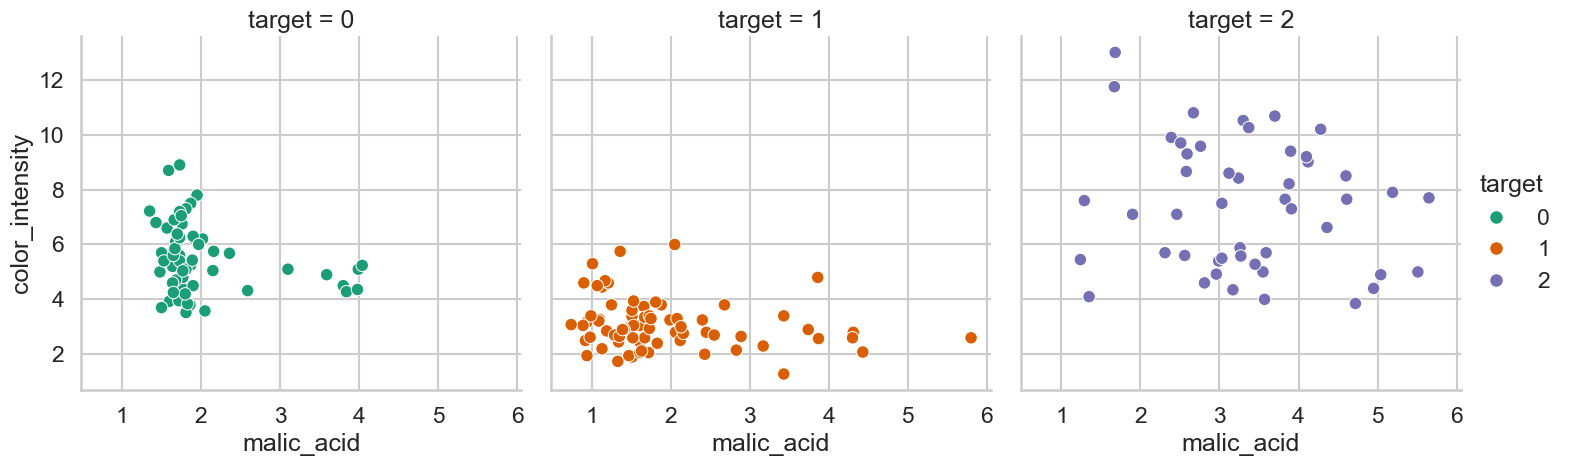

In [5]:
sns.relplot(
    data=df,
    x="malic_acid",
    y="color_intensity",
    col="target",
    kind="scatter",
    hue="target",
    palette="Dark2",
    col_wrap=3
)
plt.show()
